In [1]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import cv2
import moviepy.editor

In [2]:
os.chdir('..')
os.getcwd()

'/home/admin-gpu/Downloads/action_recognition/action_recognition'

# Train (как 80% исходного train)

Подвыборки `train` c 200 видео на каждый класс.

In [3]:
dataset_path = "data/interim/kinetics_700_2020/train/train_part_above_fps12.csv"
df = pd.read_csv(dataset_path, sep=",", index_col=False)

In [4]:
df

label                                         name_video  \
0            belly dancing  data/interim/kinetics_700_2020/train/videos/vi...   
1             breakdancing  data/interim/kinetics_700_2020/train/videos/vi...   
2           dancing ballet  data/interim/kinetics_700_2020/train/videos/vi...   
3        jumpstyle dancing  data/interim/kinetics_700_2020/train/videos/vi...   
4           square dancing  data/interim/kinetics_700_2020/train/videos/vi...   
...                    ...                                                ...   
1861      dancing macarena  data/interim/kinetics_700_2020/train/videos/vi...   
1862        square dancing  data/interim/kinetics_700_2020/train/videos/vi...   
1863        square dancing  data/interim/kinetics_700_2020/train/videos/vi...   
1864      mosh pit dancing  data/interim/kinetics_700_2020/train/videos/vi...   
1865  country line dancing  data/interim/kinetics_700_2020/train/videos/vi...   

      duration_cv  duration_moviepy  frames_cv  fps_cv  
0       10.000000             10.00      250.0   25.00  
1       10.033003             10.03      152.0   15.15  
2       10.010010             10.01      300.0   29.97  
3       10.000000             10.00      150.0   15.00  
4       10.000000             10.00      300.0   30.00  
...           ...               ...        ...     ...  
1861    10.010010             10.01      300.0   29.97  
1862    10.010010             10.01      300.0   29.97  
1863    10.000000             10.00      300.0   30.00  
1864    10.010010             10.01      300.0   29.97  
1865    10.000000             10.00      250.0   25.00  

[1866 rows x 6 columns]

In [5]:
class_labels = df["label"].unique().tolist()

for label in class_labels:
    print(label)
    
print(len(class_labels))

belly dancing
breakdancing
dancing ballet
jumpstyle dancing
square dancing
country line dancing
tango dancing
robot dancing
dancing charleston
tap dancing
dancing macarena
swing dancing
mosh pit dancing
dancing gangnam style
salsa dancing
15


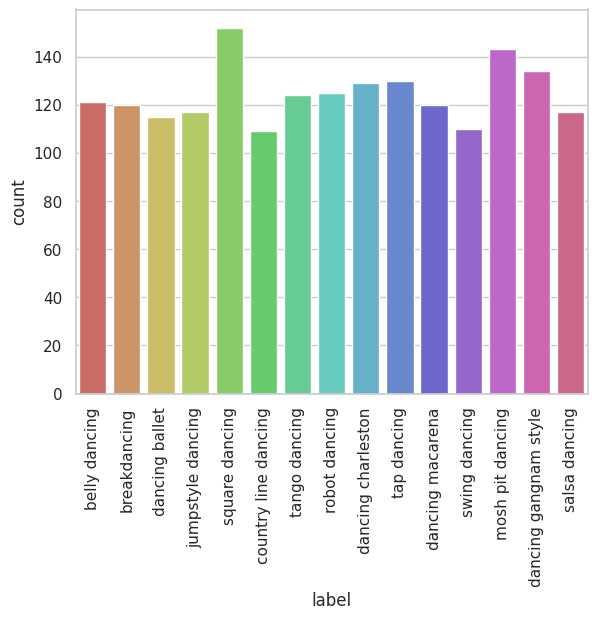

In [6]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
sns.countplot(x='label', data=pd.DataFrame(df["label"]), palette='hls', ax=ax)
ax.set_xticklabels(class_labels)
plt.xticks(rotation=90)
plt.show()

Максимально возможное число - 160 от исходных 200 видео на класс.Но из за недоступности для скачивание некоторых видео разброс все же есть.

Продолжительность всех видео 10 секунд.

# Val (как 20% исходного train)

Подвыборки `train` c 200 видео на каждый класс.

In [7]:
dataset_path = "data/interim/kinetics_700_2020/train/val_part_above_fps12.csv"
df = pd.read_csv(dataset_path, sep=",", index_col=False)

In [8]:
df

label                                         name_video  \
0              tap dancing  data/interim/kinetics_700_2020/train/videos/vi...   
1            robot dancing  data/interim/kinetics_700_2020/train/videos/vi...   
2    dancing gangnam style  data/interim/kinetics_700_2020/train/videos/vi...   
3        jumpstyle dancing  data/interim/kinetics_700_2020/train/videos/vi...   
4            swing dancing  data/interim/kinetics_700_2020/train/videos/vi...   
..                     ...                                                ...   
460   country line dancing  data/interim/kinetics_700_2020/train/videos/vi...   
461   country line dancing  data/interim/kinetics_700_2020/train/videos/vi...   
462            tap dancing  data/interim/kinetics_700_2020/train/videos/vi...   
463          swing dancing  data/interim/kinetics_700_2020/train/videos/vi...   
464       mosh pit dancing  data/interim/kinetics_700_2020/train/videos/vi...   

     duration_cv  duration_moviepy  frames_cv  fps_cv  
0      10.010010             10.01      300.0   29.97  
1      10.000000             10.00      250.0   25.00  
2      10.032787             10.03      153.0   15.25  
3      10.008340             10.01      240.0   23.98  
4      10.010010             10.01      300.0   29.97  
..           ...               ...        ...     ...  
460    10.010010             10.01      300.0   29.97  
461    10.000000             10.00      250.0   25.00  
462    10.010010             10.01      300.0   29.97  
463    10.000000             10.00      300.0   30.00  
464    10.000000             10.00      250.0   25.00  

[465 rows x 6 columns]

In [9]:
class_labels = df["label"].unique().tolist()

for label in class_labels:
    print(label)
    
print(len(class_labels))

tap dancing
robot dancing
dancing gangnam style
jumpstyle dancing
swing dancing
salsa dancing
mosh pit dancing
dancing ballet
tango dancing
square dancing
belly dancing
breakdancing
dancing macarena
country line dancing
dancing charleston
15


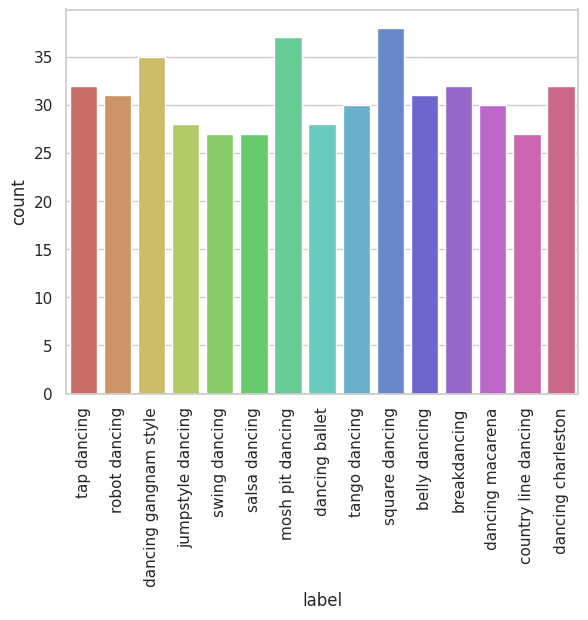

In [10]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
sns.countplot(x='label', data=pd.DataFrame(df["label"]), palette='hls', ax=ax)
ax.set_xticklabels(class_labels)
plt.xticks(rotation=90)
plt.show()

Максимально возможное число - 40 от исходных 200 видео на класс.Но из за недоступности для скачивание некоторых видео разброс все же есть.

# Test (как исходный val)

Исходная `val` подвыборка c 50 видео на каждый класс.

In [11]:
dataset_path = "data/interim/kinetics_700_2020/val/val_above_fps12.csv"
df = pd.read_csv(dataset_path, sep=",", index_col=False)

In [12]:
df

label                                         name_video  \
0    belly dancing  data/interim/kinetics_700_2020/val/videos/vide...   
1    belly dancing  data/interim/kinetics_700_2020/val/videos/vide...   
2    belly dancing  data/interim/kinetics_700_2020/val/videos/vide...   
3    belly dancing  data/interim/kinetics_700_2020/val/videos/vide...   
4    belly dancing  data/interim/kinetics_700_2020/val/videos/vide...   
..             ...                                                ...   
558    tap dancing  data/interim/kinetics_700_2020/val/videos/vide...   
559    tap dancing  data/interim/kinetics_700_2020/val/videos/vide...   
560    tap dancing  data/interim/kinetics_700_2020/val/videos/vide...   
561    tap dancing  data/interim/kinetics_700_2020/val/videos/vide...   
562    tap dancing  data/interim/kinetics_700_2020/val/videos/vide...   

     duration_cv  duration_moviepy  frames_cv  fps_cv  
0       10.01001             10.01      300.0   29.97  
1       10.01001             10.01      300.0   29.97  
2       10.00000             10.00      300.0   30.00  
3       10.00000             10.00      300.0   30.00  
4       10.00000             10.00      250.0   25.00  
..           ...               ...        ...     ...  
558     10.00000             10.00      300.0   30.00  
559     10.00000             10.00      240.0   24.00  
560     10.00000             10.00      300.0   30.00  
561     10.01001             10.01      300.0   29.97  
562     10.00000             10.00      300.0   30.00  

[563 rows x 6 columns]

In [13]:
class_labels = df["label"].unique().tolist()

for label in class_labels:
    print(label)
    
print(len(class_labels))

belly dancing
breakdancing
country line dancing
dancing ballet
dancing charleston
dancing gangnam style
dancing macarena
jumpstyle dancing
mosh pit dancing
robot dancing
salsa dancing
square dancing
swing dancing
tango dancing
tap dancing
15


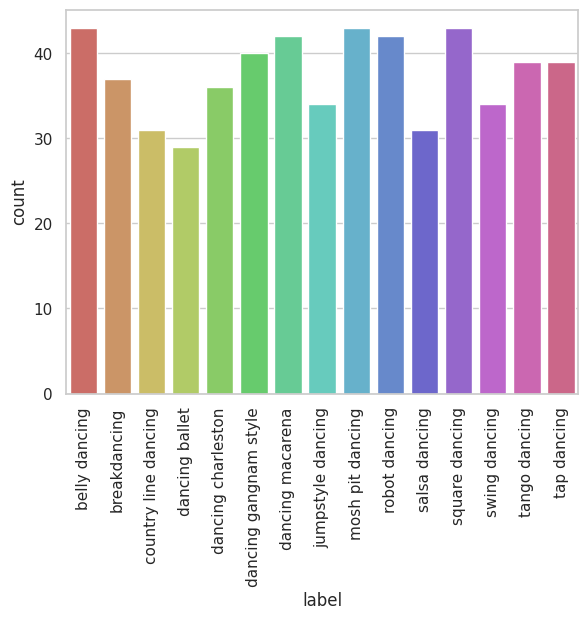

In [14]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
sns.countplot(x='label', data=pd.DataFrame(df["label"]), palette='hls', ax=ax)
ax.set_xticklabels(class_labels)
plt.xticks(rotation=90)
plt.show()

Максимально возможное число - 50 от исходных 50 видео на класс.